In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve, average_precision_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/train',
    target_size=(250, 250),
    batch_size= 16,
    class_mode = 'categorical'
)
test_datagen = ImageDataGenerator(
    rescale = 1./225
)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/test',
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical',
    shuffle=False 
)

model = Sequential([
    layers.Conv2D(32,(2,2),activation="relu",input_shape=(250, 250,3),padding="valid"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding="valid"),
    
    layers.Conv2D(64,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(256,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(512,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(1024,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(1024,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(2,activation="softmax")
])
model.summary()
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("model_epoch_{epoch:02d}.keras",  # Save file as 'model_epoch_01.h5', 'model_epoch_02.h5', etc.
                             save_weights_only=False,  # Saves the entire model (architecture + weights)
                             save_freq='epoch',        # Save after every epoch
                             verbose=1)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Found 2076 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 249, 249, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 249, 249, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 123, 123, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 123, 123, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 29, 29, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 13, 13, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 5, 5, 1024)          │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 5, 5, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,663,074 (29.23 MB)

 Trainable params: 7,655,458 (29.20 MB)

 Non-trainable params: 7,616 (29.75 KB)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 50s 288ms/step - accuracy: 0.7025 - loss: 0.7267 - val_accuracy: 0.4892 - val_loss: 1.1281
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.8081 - loss: 0.4575 - val_accuracy: 0.4848 - val_loss: 1.0665
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.8289 - loss: 0.4437 - val_accuracy: 0.6494 - val_loss: 0.6122
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - accuracy: 0.8594 - loss: 0.3451 - val_accuracy: 0.8571 - val_loss: 0.3257
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - accuracy: 0.8618 - loss: 0.3438 - val_accuracy: 0.9004 - val_loss: 0.2769
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.8527 - loss: 0.3462 - val_accuracy: 0.9264 - val_loss: 0.2200
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 190ms/step - accuracy: 0.8495 - loss: 0.3493 - val_accuracy: 0.9048 - val_loss: 0.2470
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.8762 - loss: 0

130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.9186 - loss: 0.2331
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9343 - loss: 0.2199
Train Accuracy: 0.9268
Validation Accuracy: 0.9524


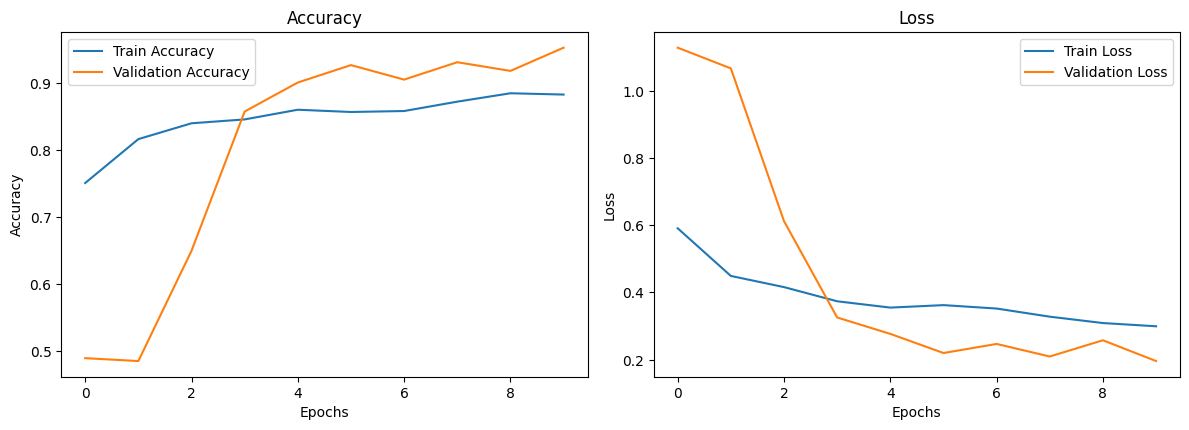

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


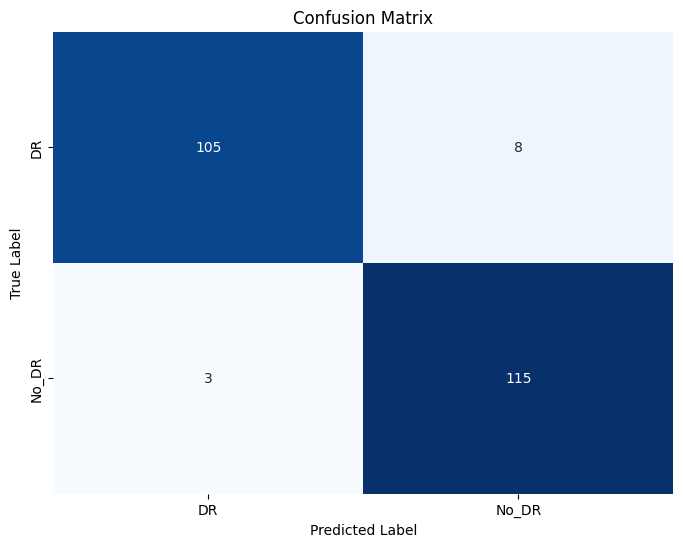

Classification Report:
              precision    recall  f1-score   support

          DR       0.97      0.93      0.95       113
       No_DR       0.93      0.97      0.95       118

    accuracy                           0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231



In [5]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(test_generator)
print(f'Train Accuracy: {train_acc:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Save the model
model.save('citrus_disease_detection_v1.h5')

# Example usage of the prediction function
def predict_xray_image(model, img_path):
    img = image.load_img(img_path, target_size=(250, 250))  # Match size to model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        result = 'Positive'
    else:
        result = 'Negative'

    plt.imshow(img)
    plt.title(f'Prediction: {result}')
    plt.show()

# Visualize metrics using Pandas and Matplotlib
history_df = pd.DataFrame(history.history)

# Plot multiple graphs (Accuracy and Loss)
plt.figure(figsize=(12, 8))

# Subplot for accuracy
plt.subplot(2, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(2, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions for the test set
Y_pred = model.predict(test_generator)
Y_pred = np.argmax(Y_pred,axis=1)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, Y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(test_generator.classes, Y_pred, target_names=test_generator.class_indices.keys()))